<a href="https://colab.research.google.com/github/hitesh-bhatnagar/CodeClause_Internship_Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing Hugging face 'transformers' library
%pip install transformers tensorflow

There are several Pre-Trained models and Tokenizer but we are going to use `distilbert-base-uncased-finetuned-sst-2-english` model

In [2]:
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer

import tensorflow as tf
import numpy as np


In [3]:
# Load the pre-trained model and tokenizer

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
model = TFAutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/501M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Creating  a function that uses the pre-trained model to analyze sentiment

In [4]:
def analyze_sentiment(sentence):

    inputs = tokenizer(sentence, return_tensors = "tf")

    # getting the feedback of sentiment from the model

    outputs = model(inputs)
    logits = outputs.logits

    # Get the predicted sentiment

    predicted_class = np.argmax(logits, axis=-1)[0]
    confidence = tf.nn.softmax(logits, axis =-1)[0][predicted_class].numpy()

    sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}

    sentiment = sentiment_mapping[predicted_class]
    return sentiment , confidence

In [16]:
user_input = input("Enter a sentence or review : ")
sentiment, confidence = analyze_sentiment(user_input)

print(f"The sentiment of the input text is: {sentiment} with confidence {confidence:.2f}")

Enter a sentence or review : The battery life of this camera is too short
The sentiment of the input text is: Negative with confidence 0.94


In [18]:
# Test cases
test_sentences = [

    # positive sentences

    "I absolutely loved the new restaurant downtown; the food was delicious and the service was excellent!",
    "The book was a fantastic read, full of captivating stories and well-developed characters.",
    "I'm thrilled with my new job; the team is supportive and the work is exciting.",

    # Negative sentiments

    "The movie was a huge disappointment; the plot was predictable and the acting was mediocre.",
    "I had a terrible experience at the hotel; the room was dirty and the staff was unhelpful.",
    "The product stopped working after a week, and customer service was not responsive.",

    # Neutral sentiments

    "The meeting is scheduled for 3 PM tomorrow.",
    "I purchased a new laptop yesterday.",
    "The event will take place at the community center.",

    # Mixed sentiments

    "The vacation was great overall, but the weather was a letdown and some activities were cancelled.",
    "I enjoyed the concert, but the sound quality was poor and the seats were uncomfortable.",
    "The new app has a lot of useful features, but it's quite buggy and crashes frequently.",

    # Complex sentiments

    "The new policy has some benefits, like increased flexibility, but it also creates confusion and additional paperwork.",
    "I appreciate the effort put into the project, but the final result doesn't meet our expectations.",
    "While the service was friendly, the wait times were excessive, making the experience frustrating overall.",

]


results = [analyze_sentiment(sentence) for sentence in test_sentences]

# Extract sentiments and confidence scores
sentiments = [result[0] for result in results]
confidence_scores = [result[1] for result in results]

# Print the results
for sentence, sentiment, confidence in zip(test_sentences, sentiments, confidence_scores):
    print(f"Sentence: {sentence}")
    print(f"Sentiment: {sentiment}, Confidence: {confidence:.2f}")
    print()

Sentence: I absolutely loved the new restaurant downtown; the food was delicious and the service was excellent!
Sentiment: Positive, Confidence: 0.99

Sentence: The book was a fantastic read, full of captivating stories and well-developed characters.
Sentiment: Positive, Confidence: 0.99

Sentence: I'm thrilled with my new job; the team is supportive and the work is exciting.
Sentiment: Positive, Confidence: 0.99

Sentence: The movie was a huge disappointment; the plot was predictable and the acting was mediocre.
Sentiment: Negative, Confidence: 0.98

Sentence: I had a terrible experience at the hotel; the room was dirty and the staff was unhelpful.
Sentiment: Negative, Confidence: 0.98

Sentence: The product stopped working after a week, and customer service was not responsive.
Sentiment: Negative, Confidence: 0.96

Sentence: The meeting is scheduled for 3 PM tomorrow.
Sentiment: Neutral, Confidence: 0.93

Sentence: I purchased a new laptop yesterday.
Sentiment: Positive, Confidence: 

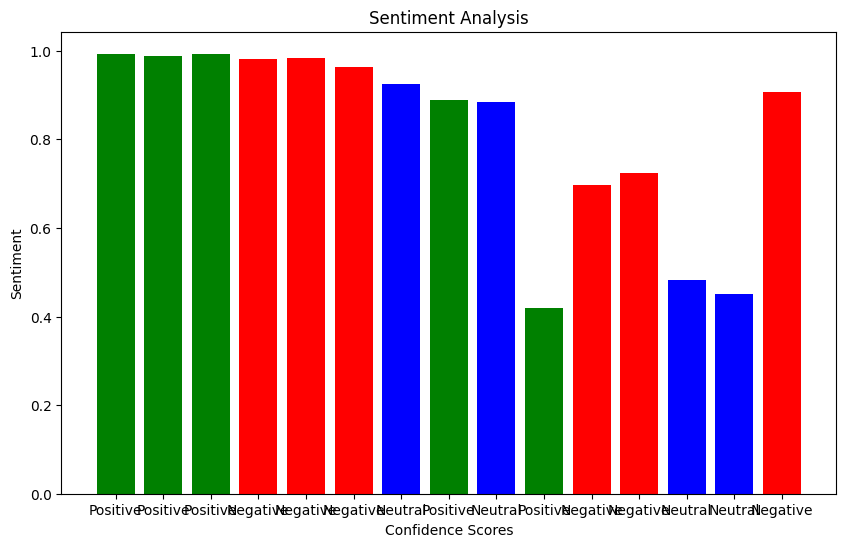

In [19]:
import matplotlib.pyplot as plt
def plot_sentiment_analysis(sentences, sentiments, confidence_scores):

  plt.figure(figsize=(10, 6))
  bar_colors = ["green" if sentiment == "Positive" else "red" if sentiment == 'Negative' else 'blue' for sentiment in sentiments]

  plt.bar(range(len(sentiments)), confidence_scores, color=bar_colors)

  plt.xlabel('Confidence Scores')
  plt.ylabel('Sentiment')
  plt.title('Sentiment Analysis')
  plt.xticks(range(len(sentiments)), sentiments)

  plt.show()

plot_sentiment_analysis(test_sentences, sentiments, confidence_scores)